# Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is similar to principal components analysis (PCA). SVD can be used to estimate or generalise signals (or images) by extracting the most importance 'features'. SVD is regarded as better and more sensitive in terms of information content and robustness if compared to Fourier decomposition. 

References

1. Qiu, H., Lee, J., Lin, J., & Yu, G. (2006). Wavelet filter-based weak signature detection method and its application on rolling element bearing prognostics. Journal of sound and vibration, 289(4-5), 1066-1090.
2. https://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm

## Objectives

* exploratory data analysis (EDA)
* to implement SVD and understand how it works
* to apply dask framework for a very large dataset

## **Installations**

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=d8f3eaf87160dc47cf1577090dc8cb604092da6ca88e247b75efa4c7c8f296bb
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!pip install "dask[complete]"

In [ ]:
!pip install dask_ml

In [ ]:
!pip install dask distributed --upgrade

## Imports

In [ ]:
import pandas as pd
import numpy as np
import wget

import io
import os

import matplotlib.pyplot as plt
import seaborn

import dask
import dask.dataframe as dd
import dask.array as da

In [ ]:
import dask_ml.decomposition

In [ ]:
from dask_ml.decomposition import PCA, TruncatedSVD

## Dataset Phase I

In [ ]:
!wget "https://ti.arc.nasa.gov/c/3/" -O IMS.7z

--2021-07-08 14:37:38--  https://ti.arc.nasa.gov/c/3/
Resolving ti.arc.nasa.gov (ti.arc.nasa.gov)... 128.102.105.66, 2001:4d0:6311:2227:14b6:372b:2078:2a94
Connecting to ti.arc.nasa.gov (ti.arc.nasa.gov)|128.102.105.66|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://ti.arc.nasa.gov/m/project/prognostic-repository/IMS.7z [following]
--2021-07-08 14:37:39--  https://ti.arc.nasa.gov/m/project/prognostic-repository/IMS.7z
Reusing existing connection to ti.arc.nasa.gov:443.
HTTP request sent, awaiting response... 200 OK
Length: 1075320408 (1.0G) [application/x-7z-compressed]
Saving to: ‘IMS.7z’

IMS.7z              100%[===================>]   1.00G  41.2MB/s    in 26s     

2021-07-08 14:38:04 (39.8 MB/s) - ‘IMS.7z’ saved [1075320408/1075320408]



In [ ]:
!p7zip -d IMS.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1075320408 bytes (1026 MiB)

Extracting archive: IMS.7z
--
Path = IMS.7z
Type = 7z
Physical Size = 1075320408
Headers Size = 279
Method = LZMA:24
Solid = +
Blocks = 1

  0%      0% - 1st_test.rar                     1% - 1st_test.rar                     2% - 1st_test.rar                     3% - 1st_test.rar                     4% - 1st_test.rar                     5% - 1st_test.rar                     6% - 1st_test.rar                     7% 

### Unrar

In [ ]:
# uncomment %%capture to show the extraction process

%%capture
!unrar x "/content/1st_test.rar"
# !unrar x "/content/2nd_test.rar"

In [ ]:
# dataset = "/content/1st_test"

In [ ]:
# dataset_dir = os.path.join(os.path.dirname(dataset), '1st_test')
# sorted(os.listdir(dataset_dir))

In [ ]:
# len(sorted(os.listdir(dataset_dir)))

In [ ]:
# sorted(os.listdir(dataset_dir))[-10:-1]

In [ ]:
# first
# sorted(os.listdir(dataset_dir))[0]

In [ ]:
# second
# sorted(os.listdir(dataset_dir))[1]

In [ ]:
# last
# sorted(os.listdir(dataset_dir))[-1]

## Dataset Phase II

### Datasets load (read)

In [ ]:
df = dd.read_csv('/content/1st_test/*', sep='\t', header=None)

In [ ]:
# dataset from 2003.10.22.12.06.24 (the first from the 1st set)

df_1 = dd.read_csv('/content/1st_test/2003.10.22.12.06.24', sep='\t', header=None)

In [ ]:
# dataset from 2003.11.25.23.39.56 (the last from the 1st set)

df_2156 = dd.read_csv('/content/1st_test/2003.11.25.23.39.56', sep='\t', header=None)

### Datasets (table form)

In [ ]:
# all datasets from the 1st set combined

df.head()

,0,1,2,3,4,5,6,7
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066


In [ ]:
# dataset from 2003.10.22.12.06.24 (the first from the 1st set)
# for checking purpose

df_1.head(6)

,0,1,2,3,4,5,6,7
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
5,-0.232,-0.061,-0.281,-0.125,0.046,-0.088,-0.078,-0.078


In [ ]:
# dataset from 2003.10.22.12.06.24 (the first from the 1st set)
# for checking purpose

df_1.tail()

,0,1,2,3,4,5,6,7
20475,-0.022,-0.142,0.085,-0.078,-0.200,-0.198,-0.134,-0.093
20476,0.024,-0.156,0.042,-0.039,-0.159,-0.071,-0.227,-0.132
20477,-0.193,-0.303,-0.071,-0.125,-0.237,-0.251,-0.151,0.007
20478,-0.115,0.076,-0.078,-0.332,-0.027,-0.002,-0.151,-0.005
20479,-0.042,0.098,0.103,-0.059,-0.002,-0.342,-0.095,-0.276


In [ ]:
# dataset from 2003.11.25.23.39.56 (the last from the 1st set)
# for checking purpose

df_2156.head()

,0,1,2,3,4,5,6,7
0,-0.071,-0.117,-0.295,-0.471,0.132,-0.144,-0.173,-0.020
1,-0.066,-0.068,-0.063,-0.417,-0.271,-0.107,-0.078,-0.081
2,-0.078,-0.154,-0.193,-0.122,-0.254,-0.154,0.034,-0.107
3,-0.146,-0.222,-0.320,0.037,0.205,-0.349,0.090,-0.093
4,-0.083,-0.330,-0.088,-0.176,-0.417,0.103,-0.061,-0.190


In [ ]:
# dataset from 2003.11.25.23.39.56 (the last from the 1st set)
# for checking purpose

df_2156.tail()

,0,1,2,3,4,5,6,7
20475,-0.168,-0.068,-0.449,0.190,0.117,1.196,-0.037,-0.122
20476,-0.112,0.088,-0.493,0.266,-0.266,0.342,-0.339,-0.164
20477,-0.081,-0.020,-0.325,-0.049,-0.112,-0.481,-0.300,-0.007
20478,-0.115,-0.146,-0.190,-0.427,0.813,0.049,-0.205,0.105
20479,-0.098,-0.166,0.012,-0.552,-0.071,0.588,-0.159,0.232


In [ ]:
# transforming dask dataframe to dask array

df.to_dask_array(lengths=True)

dask.array<values, shape=(44154880, 8), dtype=float64, chunksize=(20480, 8), chunktype=numpy.ndarray>

In [ ]:
# for checking purpose

df_1_da = df[0].to_dask_array(lengths=True)

## **Whole Plots**

In [ ]:
# template for plotting

# fig, ax = plt.subplots()
# ax.plot(df_1)
# plt.show()

* Plotting the values for at all datapoints (and time) as attempt to understand trends or patterns.

* The whole datapoints are 44154880 datapoints at sampling rate of 20kHz (20480 datapoints).

* As for approximation, bearings seem to start showing degrading symptoms roughly at 1806th file (17845 minutes) for bearing 3 and at 1455th file (14335 minutes) for bearing 4.

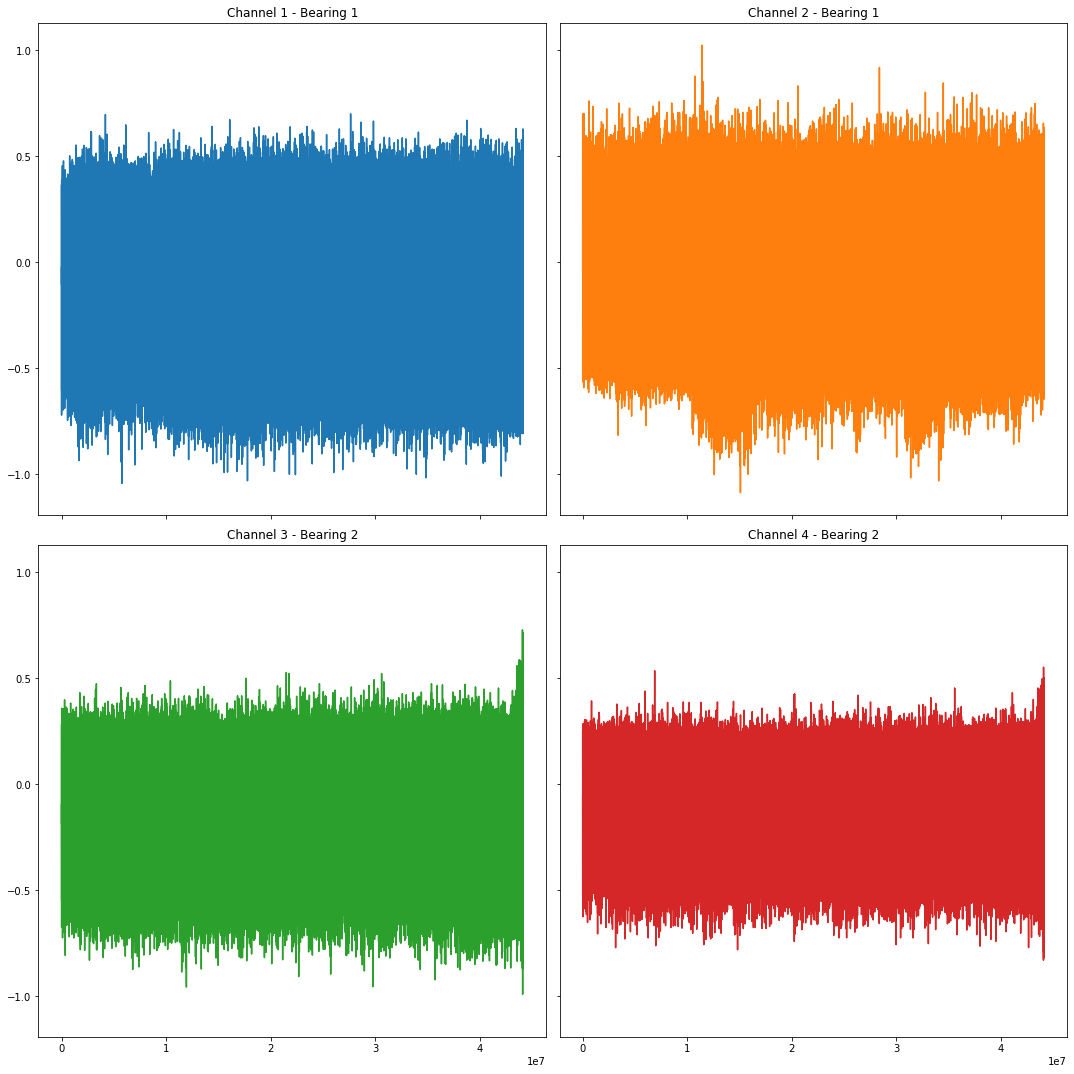

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,15), sharey=True, sharex=True)

axs[0, 0].plot(df[0].to_dask_array(lengths=True))
axs[0, 0].set_title('Channel 1 - Bearing 1')

axs[0, 1].plot(df[1].to_dask_array(lengths=True), 'tab:orange')
axs[0, 1].set_title('Channel 2 - Bearing 1')

axs[1, 0].plot(df[2].to_dask_array(lengths=True), 'tab:green')
axs[1, 0].set_title('Channel 3 - Bearing 2')

axs[1, 1].plot(df[3].to_dask_array(lengths=True), 'tab:red')
axs[1, 1].set_title('Channel 4 - Bearing 2')

fig.tight_layout(pad=1.0)

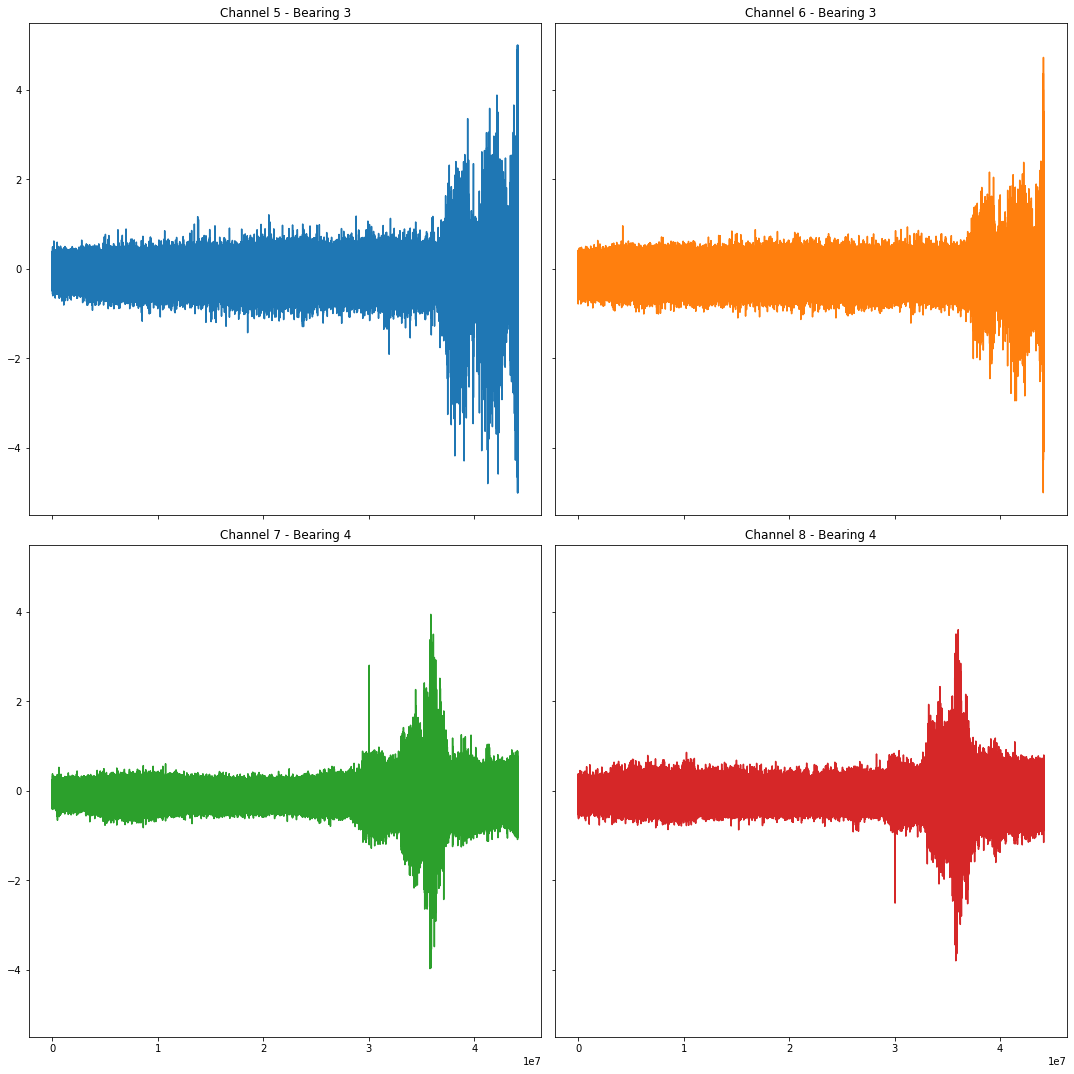

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,15), sharey=True, sharex=True)

axs[0, 0].plot(df[4].to_dask_array(lengths=True))
axs[0, 0].set_title('Channel 5 - Bearing 3')

axs[0, 1].plot(df[5].to_dask_array(lengths=True), 'tab:orange')
axs[0, 1].set_title('Channel 6 - Bearing 3')

axs[1, 0].plot(df[6].to_dask_array(lengths=True), 'tab:green')
axs[1, 0].set_title('Channel 7 - Bearing 4')

axs[1, 1].plot(df[7].to_dask_array(lengths=True), 'tab:red')
axs[1, 1].set_title('Channel 8 - Bearing 4')

fig.tight_layout(pad=1.0)

## **SVD**

* As for SVD, 5th column (Channel 5 Bearing 3) of the main dataset is selected as it may be giving one of the best, distinct and clear indicators for the degrading symptoms as shown in the previous plots.

In [ ]:
# for reference purpose

df.head()

,0,1,2,3,4,5,6,7
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066


In [ ]:
# transforming dask dataframe (5th column) to dask array

df_svd = df[4].to_dask_array(lengths=True)

In [ ]:
# note only 5th column is selected
# for checking purpose

df_svd.compute()

array([-0.105, -0.049, -0.005, ..., -0.112,  0.813, -0.071])

In [ ]:
# note the details of the array and chuck (especially bytes, shape)
# for checking purpose

df_svd

,Array,Chunk
Bytes,353.24 MB,163.84 kB
Shape,"(44154880,)","(20480,)"
Count,10780 Tasks,2156 Chunks
Type,float64,numpy.ndarray


In [ ]:
# check tail values for 5th column from df.tail()
# for checking purpose

df.tail()

,0,1,2,3,4,5,6,7
20475,-0.168,-0.068,-0.449,0.190,0.117,1.196,-0.037,-0.122
20476,-0.112,0.088,-0.493,0.266,-0.266,0.342,-0.339,-0.164
20477,-0.081,-0.020,-0.325,-0.049,-0.112,-0.481,-0.300,-0.007
20478,-0.115,-0.146,-0.190,-0.427,0.813,0.049,-0.205,0.105
20479,-0.098,-0.166,0.012,-0.552,-0.071,0.588,-0.159,0.232


In [ ]:
# check tail values for 5th column from df_1.tail() or the first dataset 2003.10.22.12.06.24
# for checking purpose

df_1.tail()

,0,1,2,3,4,5,6,7
20475,-0.022,-0.142,0.085,-0.078,-0.200,-0.198,-0.134,-0.093
20476,0.024,-0.156,0.042,-0.039,-0.159,-0.071,-0.227,-0.132
20477,-0.193,-0.303,-0.071,-0.125,-0.237,-0.251,-0.151,0.007
20478,-0.115,0.076,-0.078,-0.332,-0.027,-0.002,-0.151,-0.005
20479,-0.042,0.098,0.103,-0.059,-0.002,-0.342,-0.095,-0.276


* The array is reshaped so that every intervals (2156) can be observed (by vR later as the product of SVD).
** meaning 1st array column represents the all datapoints of 1st file (which also the start time), while 2156th array column represents the all datapoints of last file.

In [ ]:
# reshaping dask array

df_svdRe = df_svd.T.reshape(2156, 20480).T

In [ ]:
# note the array shape is similar to the previous one (or 20480 points for 2156 files)

df_svdRe

,Array,Chunk
Bytes,353.24 MB,163.84 kB
Shape,"(20480, 2156)","(20480, 1)"
Count,17248 Tasks,2156 Chunks
Type,float64,numpy.ndarray


In [ ]:
# the values are tallied

df_svdRe.compute()

array([[-0.105, -0.083, -0.122, ..., -0.593,  0.107,  0.132],
       [-0.049, -0.132, -0.244, ...,  0.366,  0.193, -0.271],
       [-0.005, -0.081, -0.156, ..., -0.393, -0.176, -0.254],
       ...,
       [-0.237,  0.056, -0.137, ..., -0.173, -0.166, -0.112],
       [-0.027, -0.186, -0.247, ..., -0.4  , -0.415,  0.813],
       [-0.002, -0.049, -0.229, ...,  0.505,  0.046, -0.071]])

### Signals estimation by SVD

In [ ]:
# SVD
# k = 20 is choosen as an initial value

u, s, v = da.linalg.svd_compressed(df_svdRe, k=20)

In [ ]:
# computing SVD components, u

u.compute()

array([[ 1.42979974e-03,  1.62042787e-03, -2.92892028e-03, ...,
        -7.56749302e-03,  2.04835755e-03, -5.38220370e-03],
       [ 7.59462846e-03,  4.27812666e-03, -1.44244608e-05, ...,
        -4.01905514e-03, -2.11187902e-03,  5.38477441e-03],
       [ 8.35603851e-04,  1.25911404e-03,  1.00824756e-02, ...,
         7.80324963e-03, -8.34346308e-03,  3.37522280e-03],
       ...,
       [-1.07274366e-02,  8.43117531e-03, -1.72418129e-03, ...,
        -4.19491056e-03, -6.70988519e-03,  1.37217420e-02],
       [ 5.73127515e-03,  6.65950394e-05,  1.36980494e-02, ...,
        -6.69503347e-03,  9.78808785e-03,  1.52177505e-03],
       [ 9.78101368e-03,  1.00557141e-02,  8.01432297e-03, ...,
        -2.80684028e-03,  4.22865163e-03,  1.08164455e-02]])

In [ ]:
# computing SVD components, s, singular values (diagonal elements)

s.compute()

array([742.83400463,  56.34518191,  46.43846191,  46.11949088,
        39.68553259,  33.38172833,  32.05856089,  28.80750482,
        27.55271629,  23.43373336,  22.72854894,  21.51040623,
        21.19023218,  20.64922497,  20.15631593,  19.97236533,
        19.81593462,  19.27716377,  19.13673088,  18.91489023])

In [ ]:
# computing SVD components, v

v.compute()

array([[-1.74170887e-02, -1.74958849e-02, -1.79990064e-02, ...,
        -1.93831202e-02, -2.22705059e-02,  2.50605359e-02],
       [ 4.89020088e-03,  3.49031861e-03,  7.24609082e-03, ...,
         6.40958707e-02, -2.66979365e-02,  3.54225916e-01],
       [ 3.21323001e-03,  4.12302035e-03,  4.74983697e-04, ...,
        -2.67122108e-03, -8.95986203e-02,  6.94941172e-01],
       ...,
       [-4.96550895e-03, -1.70086425e-02,  5.76415633e-03, ...,
         5.00516995e-03, -1.10370720e-02,  5.54355277e-03],
       [ 1.50553818e-02, -5.75692097e-03,  2.54449158e-02, ...,
        -5.03320028e-03,  1.65234004e-03, -3.01882177e-04],
       [ 9.80315156e-03,  8.54619449e-03,  1.03915836e-02, ...,
        -1.72301899e-02,  7.10864157e-03,  2.07171970e-02]])

In [ ]:
# note the details of the array and chuck (especially bytes, shape)
# for checking purpose

u

dask.array<getitem, shape=(20480, 20), dtype=float64, chunksize=(20480, 20), chunktype=numpy.ndarray>

In [ ]:
# note the details of the array and chuck (especially bytes, shape)
# after being sliced, selecting only 1st column of u
# for checking purpose

u[:, 0]

dask.array<getitem, shape=(20480,), dtype=float64, chunksize=(20480,), chunktype=numpy.ndarray>

In [ ]:
# u[:, 0].compute()

In [ ]:
X = u @ da.diag(s) @ v

In [ ]:
# note the details of the array and chuck (especially bytes, shape)
# after being decomposed by SVD and only retaining the most 5 important features
# for checking purpose

X

,Array,Chunk
Bytes,353.24 MB,163.84 kB
Shape,"(20480, 2156)","(20480, 1)"
Count,52491 Tasks,2156 Chunks
Type,float64,numpy.ndarray


In [ ]:
X.compute()

array([[-2.96834799e-03, -2.34157963e-02, -9.97689823e-05, ...,
         4.61676896e-01,  1.96033739e-01, -1.41370517e-01],
       [-1.04486693e-01, -1.08476048e-01, -1.07049335e-01, ...,
         5.75717903e-02, -3.56085479e-01,  5.67301858e-02],
       [-1.35031820e-02, -4.56649898e-04, -1.89461910e-02, ...,
        -2.46902304e-01, -1.94468574e-01,  3.18071887e-01],
       ...,
       [ 1.33345822e-01,  1.37068692e-01,  1.40981028e-01, ...,
         1.30091945e-01,  3.58638145e-02,  5.63838313e-02],
       [-7.84362395e-02, -8.24328427e-02, -7.66844222e-02, ...,
        -5.96881572e-01,  5.98311410e-02,  6.57291737e-01],
       [-1.18407031e-01, -1.14820749e-01, -1.24000705e-01, ...,
        -2.38695129e-01, -2.02326064e-01,  5.44931290e-01]])

### 100 SVD features for comparison

In [ ]:
u_100, s_100, v_100 = da.linalg.svd_compressed(df_svdRe, 100)

In [ ]:
u_100.compute()

array([[ 0.00077163, -0.00465561, -0.00794751, ...,  0.01128474,
        -0.01281263, -0.00517035],
       [ 0.00623476,  0.00295036, -0.00572136, ..., -0.00180083,
        -0.00263644,  0.00542377],
       [ 0.00331639, -0.00360613, -0.01043098, ..., -0.0078923 ,
        -0.01020478,  0.00223631],
       ...,
       [ 0.00673393,  0.00387987, -0.00439854, ..., -0.00307406,
         0.00695796, -0.01612692],
       [ 0.0149038 , -0.00446035,  0.00390476, ...,  0.00160395,
         0.00442687, -0.00573581],
       [ 0.0017897 , -0.00159983,  0.00997014, ..., -0.00161239,
        -0.00584354, -0.00327188]])

In [ ]:
s_100.compute()

array([748.60426605,  74.32182957,  72.30708677,  65.83334994,
        55.65855568,  52.57113578,  48.60785719,  46.23493328,
        41.45174478,  31.47522082,  29.6899772 ,  25.87976641,
        24.61587731,  24.1547025 ,  24.04156541,  23.86246169,
        23.47003012,  23.09967848,  22.89650111,  22.58558435,
        22.29286318,  22.11851687,  22.05265404,  21.70218382,
        21.27755039,  21.2549136 ,  21.09476131,  20.96196113,
        20.74734469,  20.60246397,  20.59377086,  20.24112355,
        20.13586801,  20.04548804,  19.90004591,  19.84578662,
        19.76206934,  19.64255048,  19.42100393,  19.3946605 ,
        19.28246798,  19.15594058,  18.9853569 ,  18.85979767,
        18.80917375,  18.72834761,  18.68633576,  18.65829346,
        18.63793587,  18.55559592,  18.47567887,  18.379868  ,
        18.35588575,  18.31649195,  18.22829503,  18.20559405,
        18.15517422,  18.08181447,  18.05990447,  17.99660933,
        17.92973213,  17.85875099,  17.81651255,  17.78

In [ ]:
v_100.compute()

array([[-1.73197068e-02, -1.74220969e-02, -1.78914541e-02, ...,
        -2.08526003e-02, -2.23784331e-02,  2.46807796e-02],
       [ 2.65522828e-03,  9.84316731e-04,  2.00487458e-03, ...,
        -1.53220647e-02, -1.15007854e-01, -1.30753330e-01],
       [ 4.43784649e-04,  5.62432519e-03, -4.13672928e-03, ...,
        -1.09745789e-01,  1.78485738e-03,  4.60637259e-01],
       ...,
       [ 2.00902876e-02, -2.58438107e-02,  1.14257227e-02, ...,
        -5.83449148e-05, -7.50063287e-03,  2.83741546e-03],
       [ 8.60805355e-03, -1.50430664e-02,  6.21728037e-03, ...,
        -5.73684791e-03, -1.42644528e-03, -1.00299446e-03],
       [-2.15378921e-03, -4.10714332e-03, -1.53651680e-02, ...,
         3.53794046e-03, -6.64595908e-03, -6.64443459e-04]])

In [ ]:
X_100 = u_100 @ da.diag(s_100) @ v_100

In [ ]:
X_100

,Array,Chunk
Bytes,353.24 MB,163.84 kB
Shape,"(20480, 2156)","(20480, 1)"
Count,52491 Tasks,2156 Chunks
Type,float64,numpy.ndarray


In [ ]:
X_100.compute()

array([[ 0.0056903 , -0.01114304,  0.00800659, ..., -0.21855304,
        -0.01123691, -0.36196145],
       [-0.05747976, -0.09227696, -0.0606102 , ...,  0.08508492,
        -0.01146014, -0.33745143],
       [-0.04650401, -0.03126007, -0.0214271 , ...,  0.11519674,
        -0.47210631, -0.29739649],
       ...,
       [-0.09246643, -0.10099639, -0.08014921, ..., -0.44964157,
         0.05566806, -0.41042828],
       [-0.14120058, -0.20312745, -0.18882113, ..., -0.51089579,
         0.25928848,  0.36052505],
       [-0.02369356, -0.01463055, -0.01981967, ...,  0.15965539,
         0.12233378,  0.62676634]])

### Plotting X (Product of SVD)

Transforming (reshaping) into original shape

In [ ]:
df_svd

,Array,Chunk
Bytes,353.24 MB,163.84 kB
Shape,"(44154880,)","(20480,)"
Count,10780 Tasks,2156 Chunks
Type,float64,numpy.ndarray


In [ ]:
df_svdRe

,Array,Chunk
Bytes,353.24 MB,163.84 kB
Shape,"(20480, 2156)","(20480, 1)"
Count,17248 Tasks,2156 Chunks
Type,float64,numpy.ndarray


In [ ]:
XRe = X.T.reshape(1, (20480*2156)).T

In [ ]:
XRe

,Array,Chunk
Bytes,353.24 MB,163.84 kB
Shape,"(44154880, 1)","(20480, 1)"
Count,58959 Tasks,2156 Chunks
Type,float64,numpy.ndarray


In [ ]:
XRe.compute()

array([[-0.00296835],
       [-0.10448669],
       [-0.01350318],
       ...,
       [ 0.05638383],
       [ 0.65729174],
       [ 0.54493129]])

Comparison of the original (Channel 5 Bearing 3) and the SVD

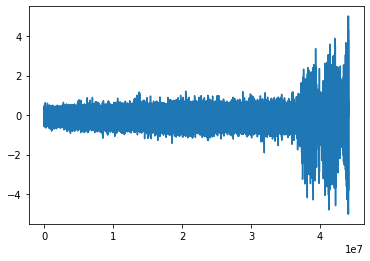

In [ ]:
plt.plot(df[4].to_dask_array(lengths=True))
plt.show()

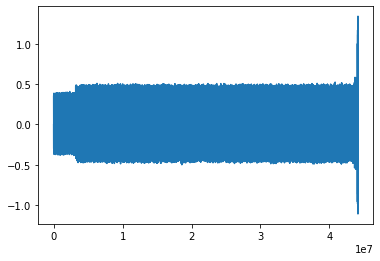

In [ ]:
plt.plot(XRe.compute())
plt.show()

### Plotting for the five most important features

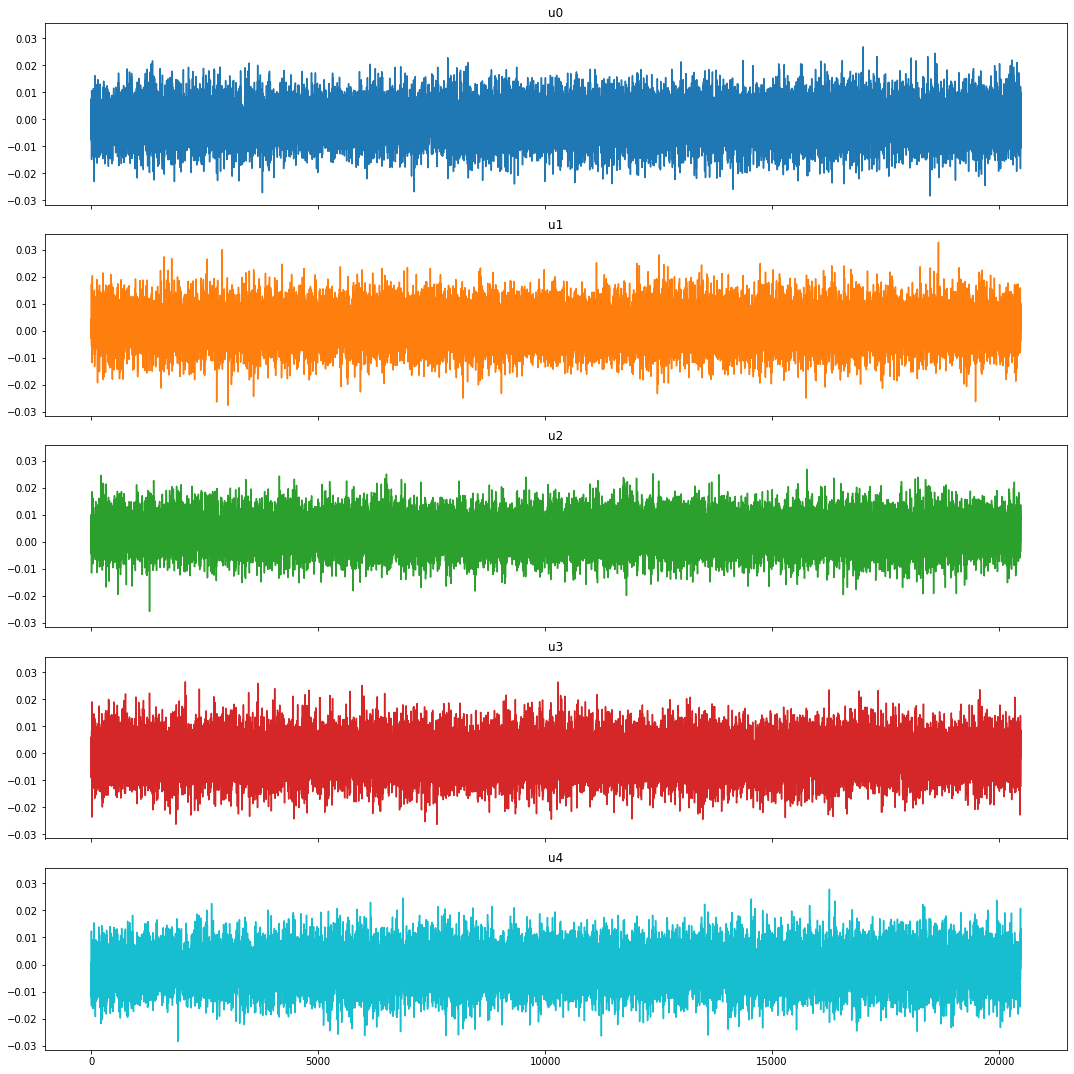

In [ ]:
fig, axs = plt.subplots(5, figsize=(15,15), sharey=True, sharex=True)
 
axs[0].plot(u[:, 0].compute())
axs[0].set_title('u0')
 
axs[1].plot(u[:, 1].compute(), 'tab:orange')
axs[1].set_title('u1')
 
axs[2].plot(u[:, 2].compute(), 'tab:green')
axs[2].set_title('u2')
 
axs[3].plot(u[:, 3].compute(), 'tab:red')
axs[3].set_title('u3')

axs[4].plot(u[:, 4].compute(), 'tab:cyan')
axs[4].set_title('u4')
 
fig.tight_layout(pad=1.0)

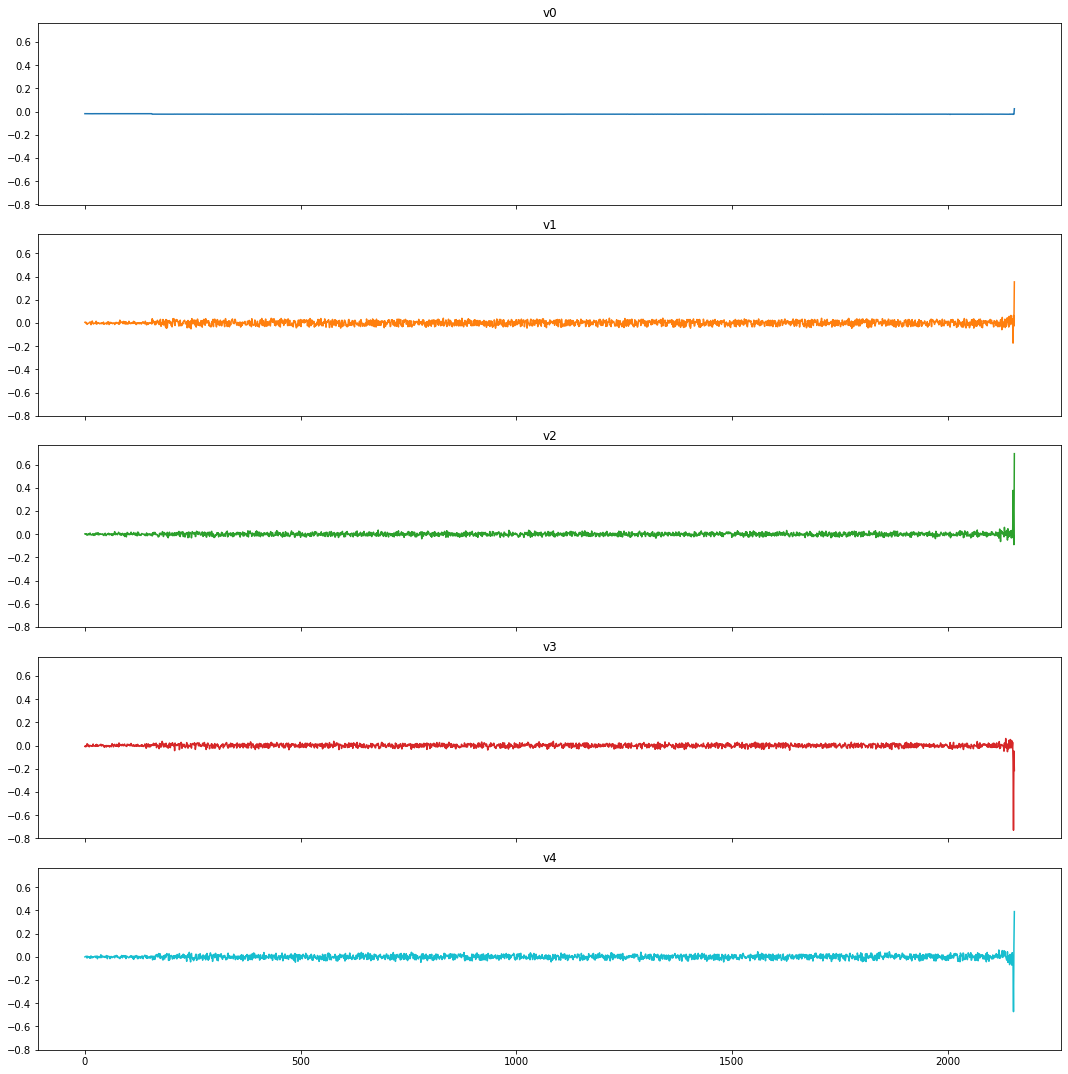

In [ ]:
fig, axs = plt.subplots(5, figsize=(15,15), sharey=True, sharex=True)
 
axs[0].plot(v[0, :].compute())
axs[0].set_title('v0')
 
axs[1].plot(v[1, :].compute(), 'tab:orange')
axs[1].set_title('v1')
 
axs[2].plot(v[2, :].compute(), 'tab:green')
axs[2].set_title('v2')
 
axs[3].plot(v[3, :].compute(), 'tab:red')
axs[3].set_title('v3')

axs[4].plot(v[4, :].compute(), 'tab:cyan')
axs[4].set_title('v4')
 
fig.tight_layout(pad=1.0)

## PCA

In [ ]:
df_pca = df[4].to_dask_array(lengths=True)

In [ ]:
df_pcaRe = df_pca.T.reshape(2156, 20480).T

In [ ]:
pca = PCA(n_components=20, svd_solver='randomized')
# pca = PCA(n_components=20, svd_solver='full')

In [ ]:
pca.fit(df_pcaRe)

PCA(n_components=20, svd_solver='full')

In [ ]:
print(pca.explained_variance_ratio_)

[0.01358222 0.0131923  0.01119521 0.00914165 0.00789448 0.00721231
 0.00676361 0.00623365 0.00385269 0.00382059 0.00247242 0.00238166
 0.00231689 0.00226788 0.00223113 0.00219796 0.00216836 0.00213858
 0.00213094 0.002078  ]


In [ ]:
print(pca.singular_values_)

[91.27243141 89.95276341 82.86486505 74.88012026 69.58504758 66.5106722
 64.40853604 61.83371998 48.61118505 48.4082348  38.94175155 38.22031065
 37.69701419 37.29616311 36.99278025 36.71677182 36.46869084 36.2173758
 36.15264296 35.70070402]


SVD

In [ ]:
df_svd = df[4].to_dask_array(lengths=True)

In [ ]:
df_svdRe = df_svd.T.reshape(2156, 20480).T

In [ ]:
u, s, v = da.linalg.svd_compressed(df_svdRe, k=20)

In [ ]:
s.compute()

array([742.02283225,  56.32591333,  56.23590599,  44.40094361,
        36.92323988,  32.79875781,  31.35890432,  30.26470279,
        28.6167697 ,  24.5304214 ,  21.93236678,  21.15660158,
        21.03547099,  20.47388016,  20.19032829,  20.06376525,
        19.87290144,  19.43007428,  19.03837506,  18.94701257])

TSVD

In [ ]:
tsvd = dask_ml.decomposition.TruncatedSVD(n_components=20, algorithm='randomized')

In [ ]:
tsvd.fit(df_svdRe)

TruncatedSVD(algorithm='randomized', n_components=20)

In [ ]:
print(tsvd.explained_variance_ratio_)

[0.00148696 0.01358222 0.01313533 0.01119521 0.00913327 0.00788955
 0.00720893 0.00675971 0.00623294 0.00385177 0.00381943 0.00246046
 0.00236191 0.00229347 0.00224659 0.00217633 0.00216354 0.00213022
 0.00210073 0.00207039]


In [ ]:
print(tsvd.singular_values_)

[751.63402406  91.27242355  89.76079966  82.86486454  74.84607424
  69.56347678  66.49520839  64.39006549  61.8302142   48.6053856
  48.40091583  38.84745994  38.0614873   37.5060653   37.12069576
  36.5356378   36.4280953   36.14655787  35.89542319  35.63525717]


TSQR

In [ ]:
tsvd_t = dask_ml.decomposition.TruncatedSVD(n_components=20, algorithm='tsqr')

In [ ]:
tsvd_t.fit(df_svdRe)

TruncatedSVD(n_components=20)

In [ ]:
print(tsvd_t.explained_variance_ratio_)

[0.00148696 0.01358222 0.01313533 0.01119521 0.00913327 0.00788955
 0.00720893 0.00675971 0.00623294 0.0038526  0.00381955 0.00247136
 0.00237699 0.0023125  0.00226408 0.0022293  0.00219774 0.00216813
 0.00213853 0.00213079]


In [ ]:
print(tsvd_t.singular_values_)

[751.63402406  91.27242355  89.76079967  82.86486459  74.84607446
  69.56347722  66.49521679  64.39007631  61.83023506  48.61062217
  48.40168608  38.93340578  38.18283598  37.66128869  37.26492659
  36.9776231   36.71486574  36.46673099  36.21692426  36.15136098]
